# Leaning outcomes
1. Drawing / Annotatitions on images
2. Image transformation (Image augmentation)
3. More image augmentation techniques
4. Bitwise operations

# Setup

In [2]:
import sys
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Annotating images using OpenCV
Why image annotations? Below are some of the use cases:
- Adding information to your images
- Drawing bounding boxes around objects

## Draw line on image
The associated function is `cv.line()`:
```
cv.line(img, pt1, pt2, color, thickness, lineType, shift)
```
1. First argument, img is the source image
2. pt1 is the first point of the line segment.
3. pt3 is the second point of the line segment.
4. thickness is like what the name suggests.
5. linetype is optional flags. Examples are:
    - cv.FILLED
    - cv.LINE_4
    - cv.LINE_8
    - cv.LINE_AA

In [5]:
img = cv.imread("images/meal.jpg")
img_copy = img.copy()
# img.shape  (614, 826)
start_point = (100, 150)
end_point = (100, 600)

cv.line(img_copy, start_point, end_point, (100, 150, 50), 2, cv.LINE_AA)

cv.imshow('line', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Draw rectangle
The function is `cv.rectangle()`.
```python
cv.rectangle(img, pt1, pt2, color, thickness, linetype, shift)
```
1. First argument, img is the source image.
2. pt1 is the vertex / corner of rectangle.
3. pt2 is the opposite vertex / corner of rectangle. Together, pt1 and pt2 form the diagonal of the rectangle.

In [6]:
img_copy = img.copy()
pts1 = (160, 250)
pts2 = (485, 475)

cv.rectangle(img_copy, pts1, pts2, (0, 0, 255), 3, cv.LINE_AA)

cv.imshow("rectangle", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Draw ellipse
The function is `cv.ellipse()`.
```python
cv.ellipse(img, center, axes, angle, startAngle, endAngle, color, ...)
```
1. First argument, img is the source image.
2. center is the center coordinates of ellipse.
3. axes is a tuple of half the axes (major & minor) lengths.
4. angle is the rotation angle. Both axes and angle arguments will determine if the output is a *horizontal* ellipse or a *vertical* ellipse.
5. If we want to draw full ellipse, then set `startAngle = 0` and `endAngle = 360`.

In [7]:
img_copy = img.copy()

center = (310, 340)
axes = (155, 95)

cv.ellipse(img_copy, center, axes, 0, 0, 360, (0, 255, 0), 2)
cv.imshow("ellipse", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Text on image
```
cv.putText()
```

In [8]:
img_copy = img.copy()

text = "The food is delicious!"
org = (25, 25)
cv.putText(img_copy, text, org, cv.FONT_HERSHEY_SIMPLEX, 0.7, (200, 100, 30), 2)
cv.imshow('text on image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise: Drawing functions
Draw a bulleye image like what shown below:  
![bulleye](img_embed/bulleye.PNG "bulleye")

# Affine transformation operations
Rotation and translation of images are among the most fundamental operations in image editing. Both fall under a broader class of *affine transformation*. Affine transformation is a linear mapping method that preserves points, straight lines and planes. Sets of parallel lines remain parallel after an affine transformation. Mathematically speaking, a transformation that can be expressed as the form of matrix multiplication (linear combination) followed by vector addition (translation).

$$A = \begin{bmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{bmatrix}, 
B = \begin{bmatrix} b_{0} \\ b_{1} \end{bmatrix} $$

$$ M = \begin{bmatrix} A & B \end{bmatrix} $$

$$ T = A . \begin{bmatrix} x \\ y \end{bmatrix} + B $$

$$ T = M . [x, y, 1]^T$$

$$ T = \begin{bmatrix} a_{00}x + a_{01}y + b_{0} \\ a_{10}x + a_{11}y + b_{1} \end{bmatrix}$$

The affine transformation is typically used to correct for geometric distortions or deformations caused by non-ideal camera angles.

## Rotation 
Two key functions:
- `cv.getRotationMatrix2D(center, angle, scale)`
    1. First argument is the center of rotation (coordinates, which is expressed as tuple).
    2. Second argument is angle of rotation in degrees.
    3. scale: scale factor which scales the image up or down.
- `cv.warpAffine(src, M, dsize, ...)`
    1. First argument is the source image.
    2. M is the transformation matrix (output of the `cv.getRotationMatrix2D()` function. 
    3. dsize is size of output image. 
... denotes optional arguments. For the complete list of arguments, visit the online [OpenCV documentation](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)

## Translation
- Create transformation matrix, $M$ which is a 2x3 array.
- Call `cv.warpAffine()` function.

In [20]:
# rotation
img = cv.imread('images/lena.jfif')
rows, cols = img.shape[:2]
M = cv.getRotationMatrix2D((cols // 2, rows // 2), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('rotated image', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [17]:
# translation
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('translated image', dst)
cv.waitKey(0)
cv.destroyAllWindows()

## OpenCV affine transformation function
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need 3 points from the input image and their corresponding locations in the output image. When it comes to the implementation part, similar to rotation, two OpenCV functions are needed: `cv.getAffineTransform()` to get the $2 \times 3$ matrix, in which this matrix will be argument for `cv.warpAffine()`.
```python
# Calculates affine transform from 3 pairs of the corresponding points
cv.getAffineTransform(src, dst)
```
1. First argument is coordinates of triangle vertices in the source image.
2. Coordinates of the corresponding triangle vertices in the destination image.

```python
cv.warpAffine(src, M, dsize, ...)
```
1. First argument, src is the input image.
2. M is the $2 \times 3$ transformation matrix.
3. dsize is the size of the output image. Usually, same as the input image size.

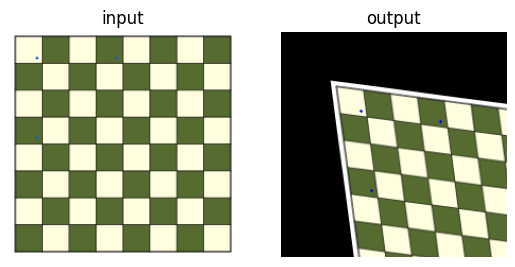

In [18]:
import matplotlib.pyplot as plt

img = cv.imread('images/chessboard.png')

# change to RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# custom affine transform
rows, cols = img.shape[:2]

pts1 = np.float32([[25, 25], [100, 25], [25, 100]])
pts2 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in pts1:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 100, 200), -1)

M = cv.getAffineTransform(pts1, pts2)
dst = cv.warpAffine(img, M, (cols, rows))

for pt in pts2:
    cv.circle(dst, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)

plt.subplot(121), plt.imshow(img), plt.title('input'), plt.axis("off")
plt.subplot(122), plt.imshow(dst), plt.title('output'), plt.axis('off')
plt.show()

## Perspective transform
<figure>
<img src="img_embed/road.jpg" style="width:50%">
<figcaption align = "center"> Figure 1: Road warped by perspective projection. </figcaption>
</figure>

<figure>
<img src="img_embed/billboard.jpg" style="width:50%">
<figcaption align = "center"> Figure 2: Billboard warped by perspective projection. </figcaption>
</figure>

The above figures show examples of perspective projection, which results in segments close to the camera appear longer than segments of identical length that are further away from the camera (Figure 2). In addition, parallel lines may appear to converge towards a vanishing point. 

Perspective transform can be an issue if we want to check if the object of interest have the right shape and size. So, this beg a question: can we "reverse" the perspective distortion? The answer is yes given that we know distinct feature of the object (normally corners).

OpenCV does provide 2 functions to perform perspective transformation:
- `cv.getPerspectiveTransform(src, dst, solveMethod)`
    * src and dst are coordinates of quadrangle vertices for source and target images respectively.
    * methods (optional) to solve the linear equations. Refer to this [link](https://docs.opencv.org/4.5.5/d2/de8/group__core__array.html#gaaf9ea5dcc392d5ae04eacb9920b9674c) for more info.
    * The output is the transformation matrix, $M$.
- `cv.warpPerspective(src, M, dsize)` returns the warped image.
    * src: input image
    * M: $3 \times 3$ transformation matrix
    * dsize: size of output image
    
To learn more about image geometric transformation, you can refer to book: **Multiple View Geometry in Computer Vision** by Richard Hartley and Andrew Zisserman.

### Exercise
Use the image "dice.jfif".

![dice](img_embed/dice_marked.jpg "dice")

Obtain the bird eye view of the region outlined in red with perspective transform.

# More image augmentation techniques
* Flipping an image
* Random cropping
* Color jittering
* Adding noise

## Flipping an image

In [ ]:
from utils import display_images

img = cv.imread("images/meal.jpg")
img_ud = cv.flip(img, 0)  # around x-axis
img_lr = cv.flip(img, 1)
img_lrud = cv.flip(img, -1)

display_images([img, img_lr, img_ud, img_lrud], 
              ("original", "left right", "up-down", "both"))

## Random cropping

In [ ]:
import os
import random

def randomcrop(img, scale=0.5):
    """Randomly crop image. The recommended scale is [0.5, 0.95]"""
    height, width = int(img.shape[0] * scale), int(img.shape[1] * scale)
    x = random.randint(0, img.shape[1] - int(width))
    y = random.randint(0, img.shape[0] - int(height))
    cropped = img[y: y+height, x: x+width]
    resized = cv.resize(cropped, (img.shape[1], img.shape[0]))
    return resized

## Color jittering

In [ ]:
def colorjitter(img, cj_type="b"):
    """
    Different color jitter:
    """
    if cj_type == "b":
        value = random.randint(-60, 60)
        while value == 0:
            value = random.randint(-60, 60)

        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        # cast to float
        v_channel = np.float32(v) + value
        v_channel = np.clip(v_channel, 0, 255).astype("uint8")
        final_hsv = cv.merge((h, s, v_channel))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        return img

    if cj_type == "s":
        value = random.randint(-60, 60)
        while value == 0:
            value = random.randint(-60, 60)

        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        # cast to float
        s_channel = np.float32(s) + value
        s_channel = np.clip(s_channel, 0, 255).astype("uint8")
        final_hsv = cv.merge((h, s_channel, v))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        return img

    if cj_type == "c":
        # multiplier coefficient randomly generated centered around mean of 1
        coef = random.gauss(1, 0.3)
        img_float = np.float32(img) * coef
        img_final = np.clip(img_float, 0, 255).astype("uint8")
        return img_final

    if cj_type == "h":
        value = random.randint(-30, 30)
        while value == 0:
            value = random.randint(-30, 30)

        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        # cast to float
        h_channel = np.float32(h) + value
        h_channel = np.clip(h_channel, 0, 179).astype("uint8")
        final_hsv = cv.merge((h_channel, s, v))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        return img

## Noise injection

In [ ]:
def add_noise(img, mean=0, sigma=30):
    """"""
    img = img.astype("float32")

    height, width, channels = img.shape
    noise = np.random.normal(loc=mean, scale=sigma, size=(height, width, channels))

    img_noise = img + noise
    img_noise = np.clip(img_noise, 0, 255).astype("uint8")
    return img_noise

# Bitwise operations
In this section, we will review four bitwise operations: *AND, OR, XOR* and *NOT*. While very basic and low level, these 4 operations are indispensible, when it comes to **masking**, **extracting specific region of an image** and **pixel-level manipulation**. 

Bitwise operations function in a binary manner. A given pixel is turned off if it has a value of zero and it is turned on if the pixel has a value greater than zero.
```python
dst = cv.bitwise_and(src1, src2[, dst[, mask]])
```
The first and second arguments are input array (images). Argument 'mask' is optional operation mask. `cv.bitwise_or` and `cv.bitwise_xor` method signature are similar to `cv.bitwise_and`.

```python
dst = cv.bitwise_not(src[, dst[, mask]])
```
The first argument is the input array, while argument 'mask' is optional operation mask.

In [10]:
from utils import display_images

rect = np.zeros((400, 400), dtype=np.uint8)
cv.rectangle(rect, (30, 30), (370, 370), 255, -1)

circle = np.zeros((400, 400), dtype=np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)
display_images([rect, circle], ("rectangle", "circle"))

In [11]:
# AND operation
res_AND = cv.bitwise_and(rect, circle)
cv.imshow('AND operator result', res_AND)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
# OR operation
res_OR = cv.bitwise_or(rect, circle)
cv.imshow("OR operator result", res_OR)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
# XOR operation
res_XOR = cv.bitwise_xor(rect, circle)
cv.imshow('XOR operator result', res_XOR)
cv.waitKey(0)
cv.destroyAllWindows()

**Exercise**  
5. Turn the white rectangle on dark background to black rectangle on white background.

# Weekly activity
1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use _"lena.jfif"_ as the input image.
    - Use external libraries `imutils`.  
    - Modify the transformation matrix.
2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](img_embed/activity3.PNG "bee_flower")
3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.